In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from tqdm import tqdm

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

In [2]:
! cp $DM21CM_DIR/outputs/dm21cm/logo_fine_records.npy .

In [12]:
rec = np.load(f"data/logo_fine_records.npy", allow_pickle=True).item()

In [13]:
rec['x_H_slice'].shape

(733, 128, 128)

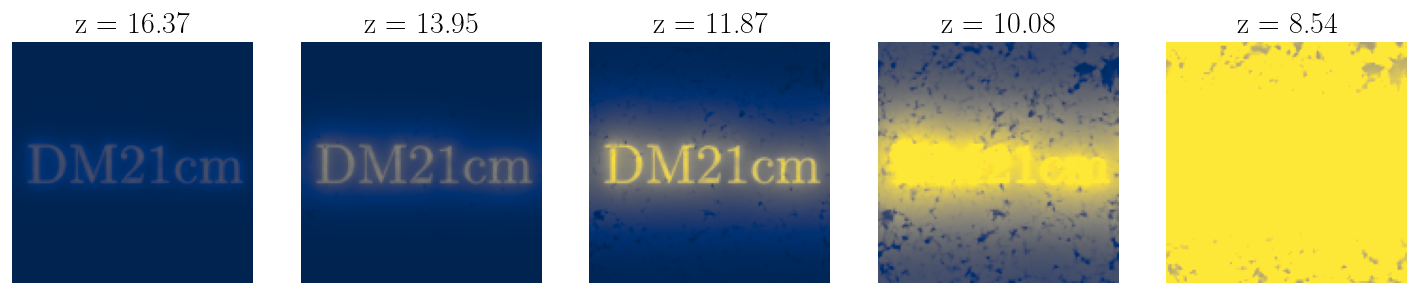

In [16]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3), sharey=True)

for i, i_z in enumerate(np.arange(200, 500+1, 75)):
#for i, i_z in enumerate(np.arange(40, 70, 3)):
    axs[i].imshow(rec['x_e_slice'][i_z], origin='lower', cmap=cms['cividis'], vmin=0, vmax=1)
    axs[i].set_title(f"z = {rec['z'][i_z]:.2f}")
    axs[i].axis('off')

In [15]:
! rm -f tmp/*

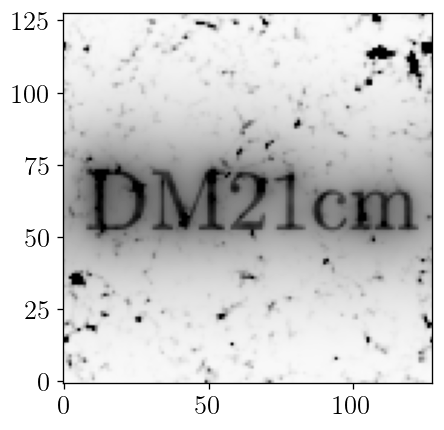

In [4]:
plt.imshow(1 - rec['x_H_slice'][350], origin='lower', vmin=0, vmax=1, cmap='binary')

In [17]:
for i in tqdm(range(len(rec['x_H_slice']))):
    plt.imshow(1 - rec['x_H_slice'][i], origin='lower', vmin=0, vmax=1, cmap='cividis')
    plt.axis('off')
    plt.savefig(f"tmp/{i}.png")
    plt.close()

  0%|          | 0/733 [00:00<?, ?it/s]

100%|██████████| 733/733 [00:44<00:00, 16.49it/s]


In [6]:
def is_white(rgba, tolerance=10):
    rgb = np.array(rgba[:3])
    white = np.array([255, 255, 255])
    return np.linalg.norm(rgb - white) < tolerance
is_white_image = np.vectorize(is_white, signature='(4)->()', excluded=['tolerance'])
# def crop(image):
#     image_data = np.array(image)
#     non_empty_columns = np.where(np.sum(~is_white_image(image_data), axis=0))[0]
#     non_empty_rows = np.where(np.sum(~is_white_image(image_data), axis=1))[0]
#     cropBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))
#     image_data_new = image_data[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1 , :]
#     return Image.fromarray(image_data_new)

In [ ]:
from PIL import Image
iw = is_white_image(Image.open(f'tmp/70.png'))
print(np.min(np.where(~iw[:,100])), np.max(np.where(~iw[:,100])))
print(np.min(np.where(~iw[100,:])), np.max(np.where(~iw[100,:])))

In [2]:
def crop(image):
    image_data = np.array(image)
    return Image.fromarray(image_data[11:381, 12:382, :])

# def crop(image): # just DM21CM
#     image_data = np.array(image)
#     return Image.fromarray(image_data[131:261, 12:382, :])

In [3]:
from PIL import Image

for i in tqdm(range(300, 490)):
    if i % 15 == 0:
        image = Image.open(f'tmp/{i}.png')
        image = crop(image)
        image.save(f'tmp/cropped/{i}.png')

100%|██████████| 190/190 [00:00<00:00, 259.45it/s]


In [ ]:
from PIL import Image

images = []
for i in tqdm(range(300, 490)):
    image = Image.open(f'tmp/{i}.png')
    images.append(crop(image))
images[0].save('xH-cividis.gif', save_all=True, append_images=images[1:], optimize=True, duration=50, loop=0)

  0%|          | 0/190 [00:00<?, ?it/s]

100%|██████████| 190/190 [00:02<00:00, 94.16it/s] 


## A. ST-ish Scale

In [39]:
z = np.linspace(5, 45, 100)
m = (z/20) ** -10
m = np.clip(m, 0, 1e4)
m = np.where(m < 10, np.log(np.exp(m) + np.exp(1)), m)

/tmp/ipykernel_128821/2508147374.py:4: RuntimeWarning: overflow encountered in exp
  m = np.where(m < 10, np.log(np.exp(m) + np.exp(1)), m)


[]

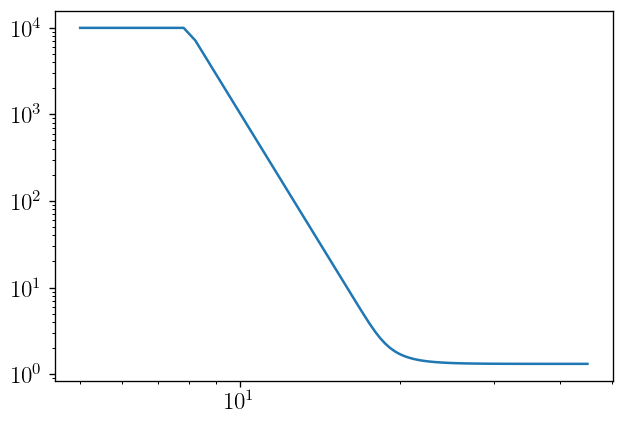

In [40]:
plt.plot(z, m)
plt.loglog()